In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **A note about the Dataset**

Our initial dataset contained 1,027,871 images. Since it was hard to load the .csv file and work with a huge dataset. 
For this approach, we have taken
1200 images for our initial train, validation and test datasets.
				
In order to divide our data into train, test and validation sets, we had to manually divide our subset into three new sets. The final division was as follows:
Train set = 1000 rows 
Test Set = 100 rows 
Validation Set = 100 rows 

In [ ]:
# Storing the dataset into a pandas dataframe
import pandas as pd

# Get this dataset from this link: https://drive.google.com/file/d/1HzxTfdZ9zbYy1tQVOQ7ZiGCCbA8W0AfG/view?usp=sharing
hotels_train = pd.read_csv("/content/drive/MyDrive/AI/datasets/train_set_1k.csv")
# Displaying the dataset
hotels_train.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,##########
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,##########
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23


In [ ]:
# Get this dataset from this link: https://drive.google.com/file/d/1FpoPtKSGkeE6ypw1A9T-UiHW3rdM42_k/view?usp=sharing
hotels_test = pd.read_csv("/content/drive/MyDrive/AI/datasets/test_set_1k.csv")
hotels_test.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,2586951,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23
1,2587024,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36
2,2587068,81814,https://traffickcam.com/images/2017/2/20160127...,traffickcam,1/27/16 22:06
3,2587091,94664,https://traffickcam.com/images/2017/2/20160130...,traffickcam,1/30/16 23:22
4,2587555,76756,https://traffickcam.com/images/2017/3/20160218...,traffickcam,2/18/16 4:42


In [ ]:
# Get this dataset from this link: https://drive.google.com/file/d/1I8JSY7g3wburwvOSkX7tDA7TwufTqKQV/view?usp=sharing
hotels_validation = pd.read_csv("/content/drive/MyDrive/AI/datasets/validation_set_1k.csv")
hotels_validation.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,2586952,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23
1,2587026,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36
2,2587068,81814,https://traffickcam.com/images/2017/2/20160127...,traffickcam,1/27/16 22:06
3,2587093,94664,https://traffickcam.com/images/2017/2/20160130...,traffickcam,1/30/16 23:22
4,2587556,76756,https://traffickcam.com/images/2017/3/20160218...,traffickcam,2/18/16 4:42


**Why did we need to label encode our hotel_id column?**

Initially, we thought that since our hotel_id was a numeric attribute, we do not need label encoding. However, we noticed that the hotel_ids weren’t starting from 0 and were placed in a random order. Some very large numbers in the range of 100,000 were also used as hotel_ids. So, if we had performed one hot vector encoding without label encoding then the length of the one hot vector would have been equal to the largest hotel id (in the 100,000 range), even though the number of unique classes were just 554.

Hence, we decided to perform label encoding, transforming the range of the hotel_ids to 0 - 554.


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
hotels_train['new_hotel_id'] = label_encoder.fit_transform(hotels_train['hotel_id'])
hotels_train.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,new_hotel_id
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,##########,168
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,##########,168
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33,369
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,443
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,12


Although we transformed the hotel_id range in the train_set, the test set and validation set still had incorrect hotel_id labels falling in the range of 100,000. In order to correct this we constructed a dictionary using the train dataset and mapped our old hotel ids to the transformed hotel ids. Using this dictionary we were able to transform the hotel ids for the validation and test sets.

In [ ]:
hotel_id_mapping = {}

# Creating a dictionary to map the old hotel ids to the new hotel ids
for i in range(1000):
  hotel_id_mapping[hotels_train['hotel_id'][i]] = hotels_train['new_hotel_id'][i]

In [ ]:
# Checking the number of unique classes (hotel_ids) in the dataset
len(hotel_id_mapping.keys())

554

In [ ]:
hotels_test_new_hotel_id = []
hotels_validation_new_hotel_id = []

# Using the dictionary we created in the previous step to add 
# the new_hotel_id column to the hotels_test and hotels_validation dataset

for i in range(100):
  hotels_test_new_hotel_id.append(hotel_id_mapping[hotels_test['hotel_id'][i]])
  hotels_validation_new_hotel_id.append(hotel_id_mapping[hotels_validation['hotel_id'][i]])
hotels_test['new_hotel_id'] = hotels_test_new_hotel_id
hotels_validation['new_hotel_id'] = hotels_validation_new_hotel_id

In [ ]:
# Displaying the hotel_test dataset to confirm that the new_hotel_id column has been added
hotels_test.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,new_hotel_id
0,2586951,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,12
1,2587024,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36,443
2,2587068,81814,https://traffickcam.com/images/2017/2/20160127...,traffickcam,1/27/16 22:06,420
3,2587091,94664,https://traffickcam.com/images/2017/2/20160130...,traffickcam,1/30/16 23:22,493
4,2587555,76756,https://traffickcam.com/images/2017/3/20160218...,traffickcam,2/18/16 4:42,392


In [ ]:
# Displaying the hotel_validation dataset to confirm that the new_hotel_id column has been added
hotels_validation.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,new_hotel_id
0,2586952,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,12
1,2587026,86350,https://traffickcam.com/images/2017/2/20160126...,traffickcam,1/26/16 0:36,443
2,2587068,81814,https://traffickcam.com/images/2017/2/20160127...,traffickcam,1/27/16 22:06,420
3,2587093,94664,https://traffickcam.com/images/2017/2/20160130...,traffickcam,1/30/16 23:22,493
4,2587556,76756,https://traffickcam.com/images/2017/3/20160218...,traffickcam,2/18/16 4:42,392


**Adding serial numbers**

Since we manually constructed new datasets, the order in which we had to fetch images from our drive also changed. Hence we had to map our new train, test and validation dataset with the correct images from our drive where we had previously stored the images. The added serial_numbers column in each of our datasets maps each row to its correct corresponding image number from the drive.

In [ ]:
# Adding serial number column to hotels
serial_numbers = [*range(0, 100000)]
hotels['serial_numbers'] = serial_numbers

In [ ]:
serial_number_mapping = {}
for i in range(4000):
  serial_number_mapping[hotels['image_id'][i]] = hotels['serial_numbers'][i] 

In [ ]:
train_serial_numbers = []
for i in range(1000):
  train_serial_numbers.append(serial_number_mapping[hotels_train['image_id'][i]])
hotels_train['serial_numbers'] = train_serial_numbers

In [ ]:
test_serial_numbers = []
validation_serial_numbers = []
for i in range(100):
  test_serial_numbers.append(serial_number_mapping[hotels_test['image_id'][i]])
  validation_serial_numbers.append(serial_number_mapping[hotels_validation['image_id'][i]])
hotels_test['serial_numbers'] = test_serial_numbers
hotels_validation['serial_numbers'] = validation_serial_numbers

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Creating the list of training images to feed in our model (X_train)
train_imgs = []
for i in range(0, 1000):
  serial_number = hotels_train['serial_numbers'][i]
  image = img_to_array(load_img(f'/content/drive/MyDrive/AI/images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  train_imgs.append(image)
  if (i % 100 == 0):
    print(i)

0
100
200
300
400
500
600
700
800
900


In [ ]:
# Creating the list of validation images to feed in our model (X_val)
validation_imgs = []
for i in range(100):
  serial_number = hotels_validation['serial_numbers'][i]
  image = img_to_array(load_img(f'/content/drive/MyDrive/AI/images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  validation_imgs.append(image)
  if (i % 100 == 0):
    print(i)

0


In [ ]:
# Creating the list of test images to feed in our model (X_test)
test_imgs = []
for i in range(100):
  serial_number = hotels_test['serial_numbers'][i]
  image = img_to_array(load_img(f'/content/drive/MyDrive/AI/images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  test_imgs.append(image)
  if (i % 100 == 0):
    print(i)

0


In [ ]:
import numpy as np

# Converting the list into a numpy array before feeding it into the model
train_imgs = np.array(train_imgs)
validation_imgs = np.array(validation_imgs)
test_imgs = np.array(test_imgs)

In [ ]:
# Getting the train_labels (y_train), validation_labels (y_val)
# and test labels(y_test) from the dataset to feed in the model

train_labels = list(hotels_train['new_hotel_id'])
validation_labels = list(hotels_validation['new_hotel_id'])
test_labels = list(hotels_test['new_hotel_id'])

In [ ]:
from tensorflow.keras.utils import to_categorical

# Converting the labels into one hot vectors (with 554 classes) to feed in the model

train_labels = to_categorical(train_labels, 554)
test_labels = to_categorical(test_labels, 554)
validation_labels = to_categorical(validation_labels, 554)

# **Function to plot learning curves**

In [ ]:
from matplotlib import pyplot

def summarize_model(history):
	# plot loss during training
  pyplot.figure(figsize=(8,6))
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.show()

# **Model 1**

In [ ]:
# Creating model 1 by applying transfer learning on ResNet50

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_1 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 554,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model_1.add(pretrained_model)
model_1.add(Flatten())
model_1.add(Dense(512, activation='relu', input_dim = (224,224,3)))
output = model_1.add(Dense(554, activation='softmax'))
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               1049088   
                                                                 
 dense_19 (Dense)            (None, 554)               284202    
                                                                 
Total params: 24,921,002
Trainable params: 1,333,290
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Compiling model 1

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Training model 1 with 10 epochs 

history_1_10 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 12s 855ms/step - loss: 6.5528 - accuracy: 0.0370 - val_loss: 6.3062 - val_accuracy: 0.0200
Epoch 2/10
10/10 [==============================] - 6s 658ms/step - loss: 5.6711 - accuracy: 0.0670 - val_loss: 6.6726 - val_accuracy: 0.0200
Epoch 3/10
10/10 [==============================] - 7s 663ms/step - loss: 4.9542 - accuracy: 0.1300 - val_loss: 6.7916 - val_accuracy: 0.0200
Epoch 4/10
10/10 [==============================] - 7s 659ms/step - loss: 4.1388 - accuracy: 0.2420 - val_loss: 6.9228 - val_accuracy: 0.0500
Epoch 5/10
10/10 [==============================] - 7s 666ms/step - loss: 3.2546 - accuracy: 0.4370 - val_loss: 6.9593 - val_accuracy: 0.0800
Epoch 6/10
10/10 [==============================] - 7s 663ms/step - loss: 2.3542 - accuracy: 0.6840 - val_loss: 6.9798 - val_accuracy: 0.0800
Epoch 7/10
10/10 [==============================] - 7s 669ms/step - loss: 1.5582 - accuracy: 0.8650 - val_loss: 7.0835 - val_accuracy: 0.0800
Epoch

In [ ]:
# Testing model 1 with 10 epochs 

testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

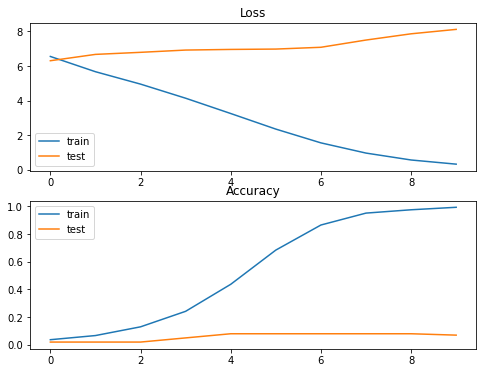

In [ ]:
# Plotting learning curve for model 1 with 10 epochs 

summarize_model(history_1_10)

In [ ]:
# Training model 1 with 20 epochs 

history_1_20 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=20, verbose=1)

Epoch 1/20
10/10 [==============================] - 55s 802ms/step - loss: 0.5719 - accuracy: 0.9610 - val_loss: 8.0519 - val_accuracy: 0.0800
Epoch 2/20
10/10 [==============================] - 7s 662ms/step - loss: 0.2555 - accuracy: 0.9930 - val_loss: 8.3343 - val_accuracy: 0.1100
Epoch 3/20
10/10 [==============================] - 7s 666ms/step - loss: 0.0994 - accuracy: 0.9990 - val_loss: 8.8011 - val_accuracy: 0.1000
Epoch 4/20
10/10 [==============================] - 7s 664ms/step - loss: 0.0432 - accuracy: 1.0000 - val_loss: 9.0904 - val_accuracy: 0.0900
Epoch 5/20
10/10 [==============================] - 7s 672ms/step - loss: 0.0245 - accuracy: 1.0000 - val_loss: 9.1880 - val_accuracy: 0.0900
Epoch 6/20
10/10 [==============================] - 7s 668ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 9.3045 - val_accuracy: 0.0900
Epoch 7/20
10/10 [==============================] - 7s 674ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 9.2798 - val_accuracy: 0.0900
Epoch

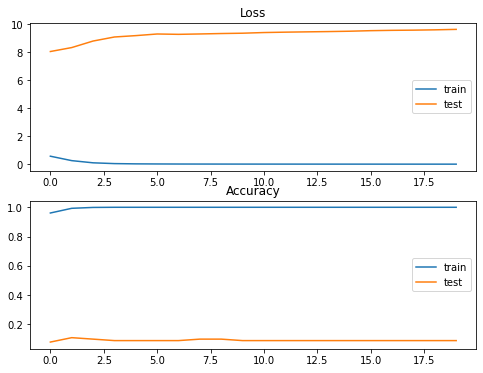

In [ ]:
# Plotting learning curve for model 1 with 20 epochs 

summarize_model(history_1_20)

In [ ]:
# Testing model 1 with 20 epochs 

testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

4/4 [==============================] - 1s 159ms/step - loss: 7.6903 - accuracy: 0.1100


# **Model 2**

In [ ]:
# Creating model 2 by applying transfer learning on ResNet50

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_2 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 554,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model_2.add(pretrained_model)
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(1024, activation='relu', input_dim = (224,224,3)))
output = model_2.add(Dense(554, activation='softmax'))
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_23 (Dense)            (None, 512)               1049088   
                                                                 
 dense_24 (Dense)            (None, 1024)              525312    
                                                                 
 dense_25 (Dense)            (None, 554)               567850    
                                                                 
Total params: 25,729,962
Trainable params: 2,142,250
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Compiling model 2

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Training model 2 with 10 epochs

history_2_10 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 11s 798ms/step - loss: 6.4979 - accuracy: 0.0320 - val_loss: 6.3963 - val_accuracy: 0.0200
Epoch 2/10
10/10 [==============================] - 7s 662ms/step - loss: 5.8432 - accuracy: 0.0530 - val_loss: 6.5597 - val_accuracy: 0.0200
Epoch 3/10
10/10 [==============================] - 7s 663ms/step - loss: 5.2240 - accuracy: 0.0790 - val_loss: 6.9387 - val_accuracy: 0.0300
Epoch 4/10
10/10 [==============================] - 7s 664ms/step - loss: 4.2960 - accuracy: 0.1980 - val_loss: 7.1903 - val_accuracy: 0.0500
Epoch 5/10
10/10 [==============================] - 7s 665ms/step - loss: 3.0334 - accuracy: 0.4530 - val_loss: 7.5616 - val_accuracy: 0.0700
Epoch 6/10
10/10 [==============================] - 7s 670ms/step - loss: 1.7404 - accuracy: 0.7260 - val_loss: 7.8254 - val_accuracy: 0.0600
Epoch 7/10
10/10 [==============================] - 7s 666ms/step - loss: 0.9080 - accuracy: 0.8710 - val_loss: 8.9717 - val_accuracy: 0.0800
Epoch

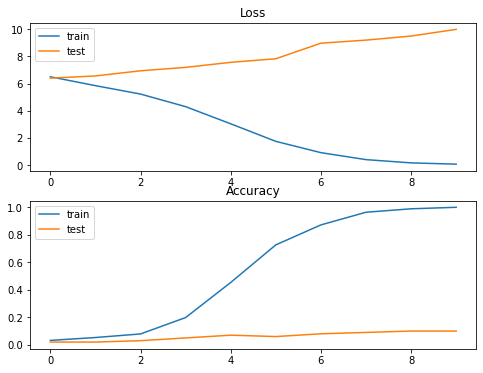

In [ ]:
# Plotting learning curve for model 2 with 10 epochs

summarize_model(history_2_10)

In [ ]:
# Testing model 2 with 10 epochs

testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)

4/4 [==============================] - 1s 168ms/step - loss: 8.6426 - accuracy: 0.0800


In [ ]:
# Training model 2 with 20 epochs

history_2_20 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=20, verbose=1)

Epoch 1/20
10/10 [==============================] - 12s 801ms/step - loss: 6.4843 - accuracy: 0.0370 - val_loss: 6.3461 - val_accuracy: 0.0200
Epoch 2/20
10/10 [==============================] - 7s 664ms/step - loss: 5.8524 - accuracy: 0.0550 - val_loss: 6.4877 - val_accuracy: 0.0200
Epoch 3/20
10/10 [==============================] - 7s 666ms/step - loss: 5.1969 - accuracy: 0.0910 - val_loss: 6.8395 - val_accuracy: 0.0400
Epoch 4/20
10/10 [==============================] - 7s 669ms/step - loss: 4.2390 - accuracy: 0.2020 - val_loss: 6.9869 - val_accuracy: 0.0600
Epoch 5/20
10/10 [==============================] - 7s 667ms/step - loss: 2.9650 - accuracy: 0.4510 - val_loss: 7.1550 - val_accuracy: 0.0700
Epoch 6/20
10/10 [==============================] - 7s 671ms/step - loss: 1.7758 - accuracy: 0.7160 - val_loss: 7.5466 - val_accuracy: 0.0700
Epoch 7/20
10/10 [==============================] - 7s 670ms/step - loss: 0.9009 - accuracy: 0.8820 - val_loss: 8.5962 - val_accuracy: 0.0900
Epoch

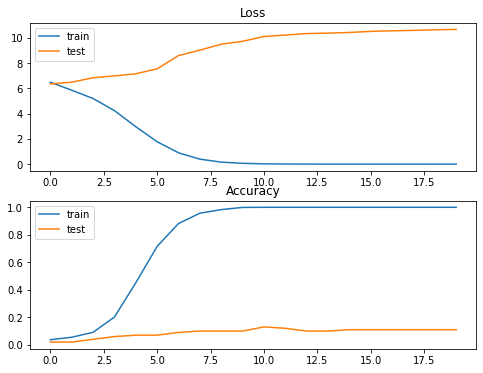

In [ ]:
# Plotting learning curve for model 2 with 20 epochs

summarize_model(history_2_20)

In [ ]:
# Testing model 2 with 20 epochs

testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)

4/4 [==============================] - 1s 160ms/step - loss: 9.6226 - accuracy: 0.1000


# **Model 3**

In [ ]:
# Creating model 3 by applying transfer learning on ResNet50

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_3 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 554,
                   weights='imagenet')

for i in range(30):
  pretrained_model.get_layer(index = i).trainable = False

model_3.add(pretrained_model)
model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(1024, activation='relu', input_dim = (224,224,3)))
output = model_3.add(Dense(554, activation='softmax'))
model_3.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_11 (Flatten)        (None, 2048)              0         
                                                                 
 dense_29 (Dense)            (None, 512)               1049088   
                                                                 
 dense_30 (Dense)            (None, 1024)              525312    
                                                                 
 dense_31 (Dense)            (None, 554)               567850    
                                                                 
Total params: 25,729,962
Trainable params: 25,504,362
Non-trainable params: 225,600
_________________________________________________________________


In [ ]:
# Compiling model 3

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Training model 3 with 10 epochs

history_3_10 = model_3.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 24s 2s/step - loss: 6.3507 - accuracy: 0.0390 - val_loss: 32.6145 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 17s 2s/step - loss: 5.9058 - accuracy: 0.0530 - val_loss: 40.9040 - val_accuracy: 0.0200
Epoch 3/10
10/10 [==============================] - 17s 2s/step - loss: 5.3095 - accuracy: 0.0900 - val_loss: 54.7226 - val_accuracy: 0.0200
Epoch 4/10
10/10 [==============================] - 17s 2s/step - loss: 4.2141 - accuracy: 0.2050 - val_loss: 25.4740 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 17s 2s/step - loss: 2.7616 - accuracy: 0.4290 - val_loss: 13.0736 - val_accuracy: 0.0200
Epoch 6/10
10/10 [==============================] - 17s 2s/step - loss: 1.4696 - accuracy: 0.6580 - val_loss: 10.6903 - val_accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 17s 2s/step - loss: 0.7233 - accuracy: 0.8340 - val_loss: 13.2844 - val_accuracy: 0.0000e+

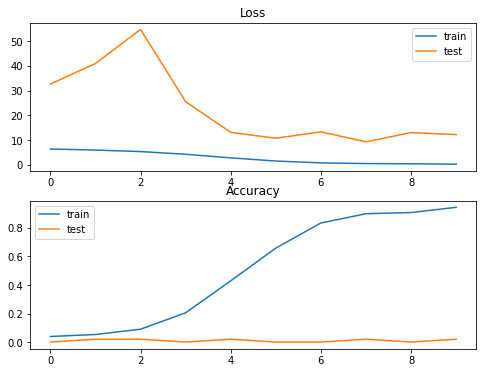

In [ ]:
# Plotting learning curve with model 3 with 10 epochs

summarize_model(history_3_10)

In [ ]:
# Testing model 3 with 10 epochs

testLoss, testAccuracy = model_3.evaluate(test_imgs, test_labels)

4/4 [==============================] - 3s 153ms/step - loss: 6.3824 - accuracy: 0.0000e+00


In [ ]:
# Training model 3 with 25 epochs

history_3_25 = model_3.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=25, verbose=1)

Epoch 1/25
10/10 [==============================] - 24s 2s/step - loss: 6.3575 - accuracy: 0.0350 - val_loss: 391.8464 - val_accuracy: 0.0200
Epoch 2/25
10/10 [==============================] - 17s 2s/step - loss: 6.1126 - accuracy: 0.0510 - val_loss: 2107.4868 - val_accuracy: 0.0000e+00
Epoch 3/25
10/10 [==============================] - 16s 2s/step - loss: 5.8168 - accuracy: 0.0600 - val_loss: 41724.3242 - val_accuracy: 0.0000e+00
Epoch 4/25
10/10 [==============================] - 16s 2s/step - loss: 5.4569 - accuracy: 0.0730 - val_loss: 2784.0823 - val_accuracy: 0.0000e+00
Epoch 5/25
10/10 [==============================] - 16s 2s/step - loss: 4.7847 - accuracy: 0.1260 - val_loss: 1028.4548 - val_accuracy: 0.0000e+00
Epoch 6/25
10/10 [==============================] - 16s 2s/step - loss: 3.8459 - accuracy: 0.2320 - val_loss: 689.8018 - val_accuracy: 0.0000e+00
Epoch 7/25
10/10 [==============================] - 16s 2s/step - loss: 2.7187 - accuracy: 0.3930 - val_loss: 178.6913 - va

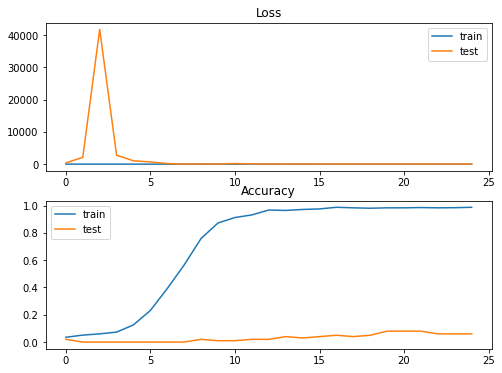

In [ ]:
# Plotting learning curve for model 3 with 25 epochs

summarize_model(history_3_25)

In [ ]:
# Testing model 3 with 25 epochs

testLoss, testAccuracy = model_3.evaluate(test_imgs, test_labels)

4/4 [==============================] - 1s 168ms/step - loss: 12.4264 - accuracy: 0.0600
